In [22]:
import wrf as w
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cmaps
import os 
import salem 
from zIO import load_modis, load_wind
from zProcess import load_NamCo_shp, mask_lake
from zMap import set_grid, add_NamCo
import warnings
warnings.filterwarnings("ignore")

def add_terrain(ax, geo_path):
    ds = xr.open_dataset(geo_path)
    hgt = ds.HGT_M.squeeze()
    lats = ds.XLAT_M.squeeze()
    lons = ds.XLONG_M.squeeze()

    crange = np.arange(3000, 7000+200, 200)
    # p = ax.pcolor(lons, lats, hgt, vmin=3000, vmax=7000, transform=ccrs.PlateCarree(), cmap='terrain')
    p = ax.contourf(lons, lats, hgt, levels=crange, extend='both', transform=ccrs.PlateCarree(), cmap='terrain')
    return p

if __name__ == '__main__':
    data_dir = '/home/zzhzhao/Model/wrfout'
    testname_list = [
#         'era5',
        'test-25-3',
        'test-25-NL',
        'test-25-NM',
        ]
    N_test = len(testname_list)

    date_start = '2013-08-23'
    date_end = '2013-09-01'

    wind_list = {'u10':dict(), 'v10':dict()}
    for testname in testname_list:
        if testname == 'era5':
            file_path = f"/home/Public_Data/MODIS/MOD11A1/MOD11A1_NamCo_{date_start[:4]}.nc"
            tsk_list[testname] = load_modis(file_path, date_start, date_end, day_or_night)
            tsk_NamCo_daily_list[testname] = tsk_list[testname]
        else:
            data_path = os.path.join(data_dir, testname)
            domain = 1 
            u10, v10, lats, lons, time = load_wind(data_path, domain)
            
            wind_list['u10'][testname] = u10.mean(dim='Time')
            wind_list['v10'][testname] = v10.mean(dim='Time')


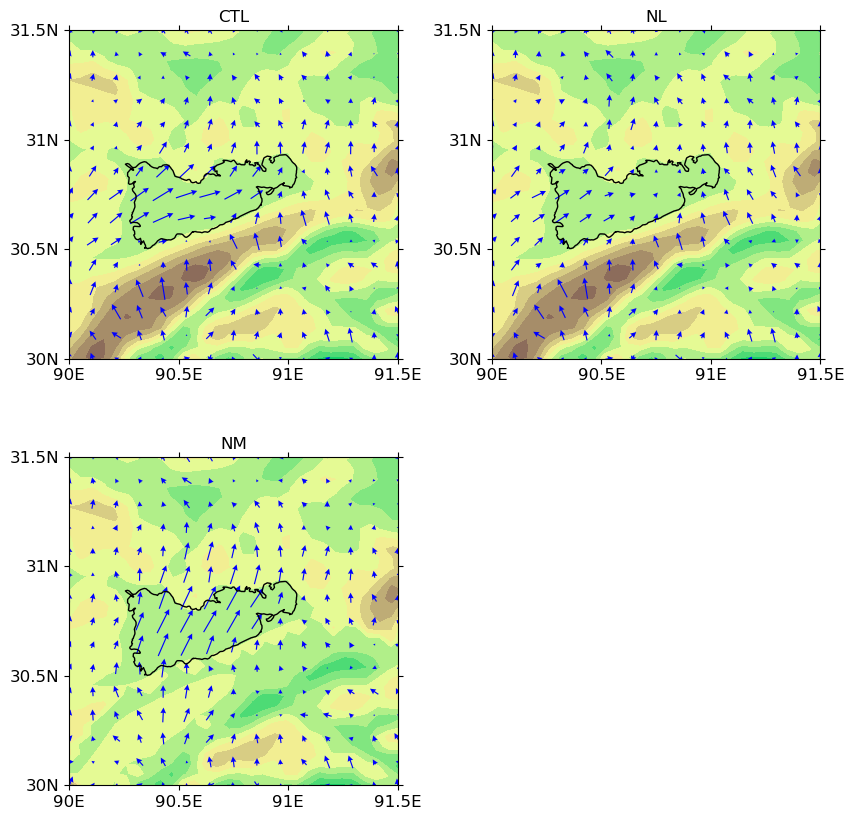

In [24]:
    labels = [
#         'CMFD',
        'CTL',
        'NL', 
        'NM', 
        ]
    proj = ccrs.PlateCarree()
    cmap = 'Spectral_r'#cmaps.WhiteBlueGreenYellowRed
    ylen = np.ceil(np.sqrt(N_test)).astype(int); xlen = np.ceil(N_test/ylen).astype(int)
    default_len = 5

    fig = plt.figure(figsize=(xlen*default_len, ylen*default_len), dpi=100)
    fig.subplots_adjust(hspace=0.3, wspace=0.2)
    axes = []
    for i, testname in enumerate(testname_list):
        ax = fig.add_subplot(ylen, xlen, i+1, projection=proj)
        var_u, var_v = wind_list['u10'][testname], wind_list['v10'][testname]
        if testname == 'era5':
            lat, lon = prec_sum_list[testname].lat, prec_sum_list[testname].lon 
        else:
            lat, lon = w.latlon_coords(var_u)
        
        set_grid(ax, lat=[30, 31.5], lon=[90, 91.5], span=.5)
        # set_grid(ax, lat=[29, 32], lon=[89, 92], span=.5)
        add_NamCo(ax)
        geo_path = f'/home/zzhzhao/Model/tests/{testname}/WPS/geo_em.d01.nc'
        p = add_terrain(ax, geo_path)
        
        q = ax.quiver(lon.values, lat.values, var_u.values, var_v.values, color='b', transform=proj, scale=35, regrid_shape=15, width=0.0035, headwidth=5, pivot='mid')
        ax.set_title(labels[i])

In [10]:
lon

<xarray.DataArray 'XLONG' (south_north: 87, west_east: 131)>
array([[86.67139 , 86.722534, 86.77368 , ..., 93.22632 , 93.277466,
        93.32861 ],
       [86.66925 , 86.72046 , 86.77164 , ..., 93.22836 , 93.27954 ,
        93.33075 ],
       [86.667114, 86.71835 , 86.76956 , ..., 93.23044 , 93.28165 ,
        93.332886],
       ...,
       [86.482544, 86.53659 , 86.59064 , ..., 93.40936 , 93.46341 ,
        93.517456],
       [86.48016 , 86.53424 , 86.58832 , ..., 93.41168 , 93.46576 ,
        93.51984 ],
       [86.47778 , 86.53189 , 86.58603 , ..., 93.41397 , 93.46811 ,
        93.52222 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 86.67 86.72 86.77 ... 93.47 93.52
    XLAT     (south_north, west_east) float32 29.01 29.01 29.01 ... 32.89 32.88
Dimensions without coordinates: south_north, west_east